---

<h1 style="text-align: center;font-size: 40px;">Dhaka AI: Traffic Detection using YOLOV8</h1>

---

<center><img src="https://img.freepik.com/free-vector/red-traffic-light-flat-illustration_1284-22959.jpg" width="500" height="600"></center>

---

The capital city of Dhaka has only 7% traffic roads (compared to 25% urban standard) in presence of approximately 8 million computers a day with i 306 sq km area. The scenario of Dhaka traffic is unique which poses complex new challenges in terms of automated traffic detection. This new AI-Based Dhaka Traffic Detection Challenge aims at accessing the ability of state-of-the-art methods to detect and recognize traffic vehicle.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

> Dataset:
The dataset is composed of vehicle images, where an image contains a vehicle of one or more of 21 different classes of vehicle. This makes the dataset useful for multiple vehicle detection and recognition. The considered vehicle classes are: ambulance, auto-rickshaw, bicycle, bus, car, garbage van, human hauler, minibus, minivan, motorbike, Pickup, army vehicle, police car, rickshaw, scooter, Suv, taxi, three-wheelers (CNG), truck, van, wheelbarrow.

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 15.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 16.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60


> Training Custom Dataset:

In [3]:
from ultralytics import YOLO
model = YOLO()
model.train(data = "/kaggle/input/dhakaaiyoloformatteddataset/traffic_update.yaml", epochs = 10)

100%|██████████| 6.23M/6.23M [00:00<00:00, 73.2MB/s]
Ultralytics YOLOv8.0.106 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/dhakaaiyoloformatteddataset/traffic_update.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, for

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias
train: Scanning /kaggle/input/dhakaaiyoloformatteddataset/yolov5_formetted_dataset/labels/train... 2390 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2390/2390 [00:17<00:00, 139.52it/s]
train: WARNING ⚠️ Cache directory /kaggle/input/dhakaaiyoloformatteddataset/yolov5_formetted_dataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/input/dhakaaiyoloformatteddataset/yolov5_formetted_dataset/labels/val... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:04<00:00, 135.00it/s]
val: WARNING ⚠️ Cache directory /kaggle/input/dhakaaiyoloformatteddataset/yolov5_formetted_dataset/labels is not writeable, cache 

In [10]:
!yolo 'detect' 'val' model= "/kaggle/working/runs/detect/train/weights/best.pt" data = "/kaggle/input/dhakaaiyoloformatteddataset/traffic_update.yaml"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.106 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients
val: Scanning /kaggle/input/dhakaaiyoloformatteddataset/yolov5_formetted_dataset
val: WARNING ⚠️ Cache directory /kaggle/input/dhakaaiyoloformatteddataset/yolov5_formetted_dataset/labels is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        600       5090      0.686      0.243      0.256      0.167
             ambulance        600         22          1          0     0.0107    0.00597
         auto rickshaw        600         70      0.515      0.229      0.339      0.222
               bicy

In [11]:
import os
os.listdir("/kaggle/working/runs/detect/val")

['F1_curve.png',
 'confusion_matrix_normalized.png',
 'confusion_matrix.png',
 'val_batch0_labels.jpg',
 'val_batch2_labels.jpg',
 'val_batch1_pred.jpg',
 'PR_curve.png',
 'val_batch0_pred.jpg',
 'val_batch2_pred.jpg',
 'P_curve.png',
 'val_batch1_labels.jpg',
 'R_curve.png']

>Validation Result:

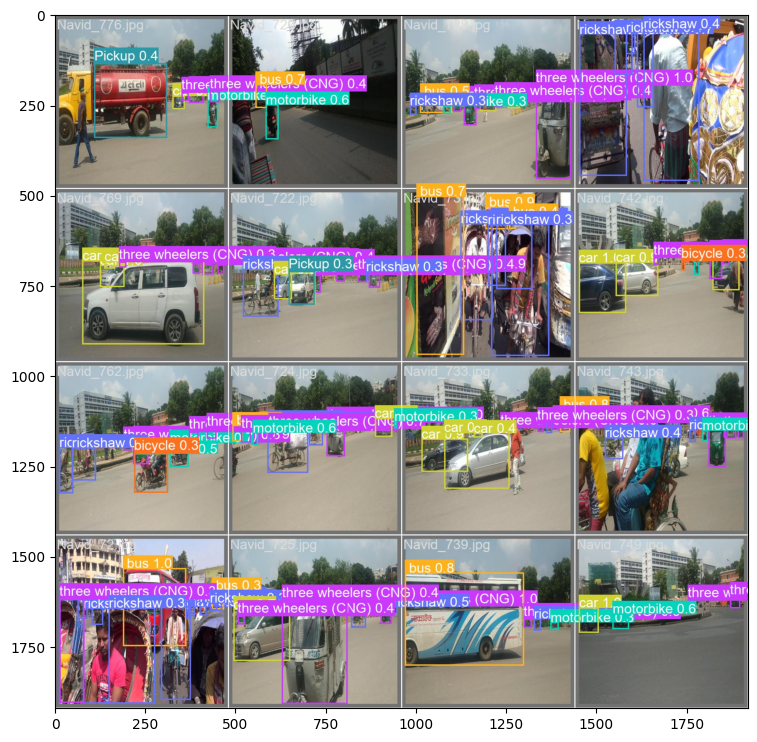

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
img = plt.imread("/kaggle/working/runs/detect/val/val_batch1_pred.jpg")
plt.imshow(img)
plt.show()

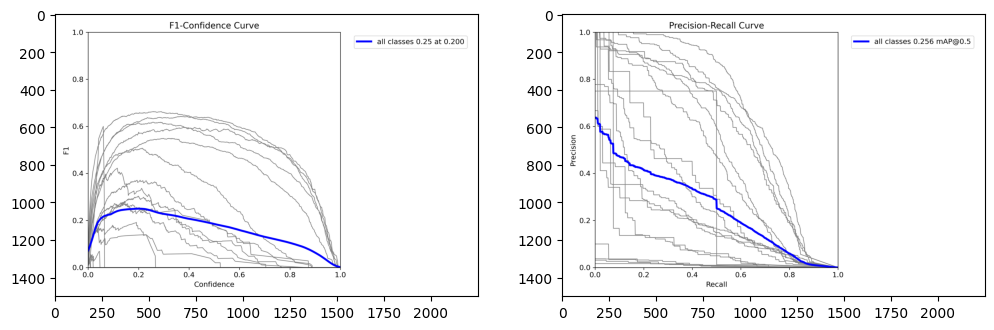

In [42]:
plt.figure(figsize=(12,9))
img = ['F1_curve.png', 'PR_curve.png']
for i,image in enumerate(img):
    plt.subplot(1,2,i+1)
    res = plt.imread(f"/kaggle/working/runs/detect/val/{image}")
    plt.imshow(res)

> Confusion Matrix:

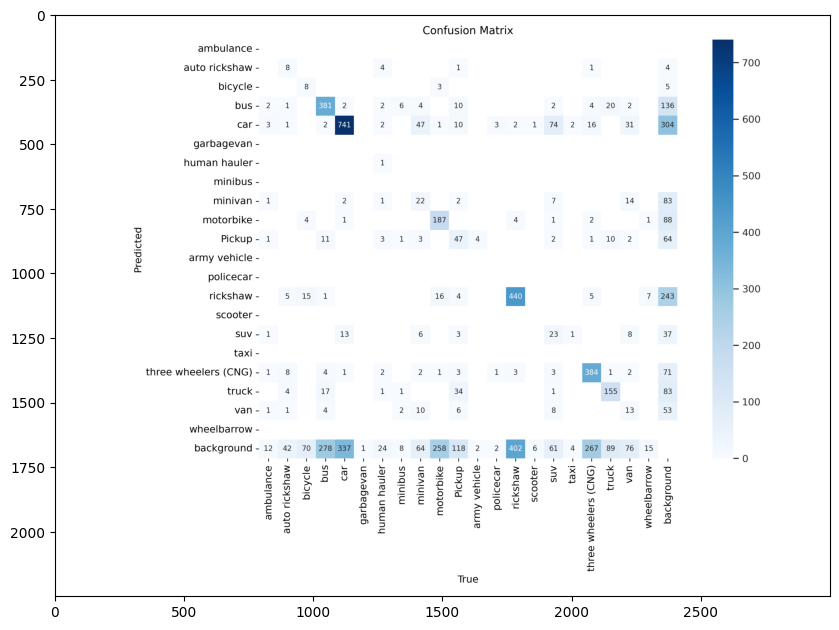

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
img = plt.imread("/kaggle/working/runs/detect/val/confusion_matrix.png")
plt.imshow(img)
plt.show()

> Testing:

In [14]:
!yolo 'detect' 'predict' model= "/kaggle/working/runs/detect/train/weights/best.pt" source = "/kaggle/input/test-images-for-dhaka-ai"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.106 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients

image 1/6 /kaggle/input/test-images-for-dhaka-ai/test_img1.jpg: 480x640 4 rickshaws, 19.3ms
image 2/6 /kaggle/input/test-images-for-dhaka-ai/test_img2.jpeg: 480x640 1 rickshaw, 8.4ms
image 3/6 /kaggle/input/test-images-for-dhaka-ai/test_img3.jpg: 480x640 1  bus, 2 cars, 1 rickshaw, 3 three wheelers (CNG)s, 6.0ms
image 4/6 /kaggle/input/test-images-for-dhaka-ai/test_img4.jpeg: 448x640 4 three wheelers (CNG)s, 15.9ms
image 5/6 /kaggle/input/test-images-for-dhaka-ai/test_img5.jpg: 384x640 1  bus, 2 trucks, 15.7ms
image 6/6 /kaggle/input/test-images-for-dhaka-ai/test_img6.jpg: 416x640 

In [16]:
os.listdir("/kaggle/working/runs/detect/predict")

['test_img5.jpg',
 'test_img1.jpg',
 'test_img6.jpg',
 'test_img2.jpeg',
 'test_img4.jpeg',
 'test_img3.jpg']

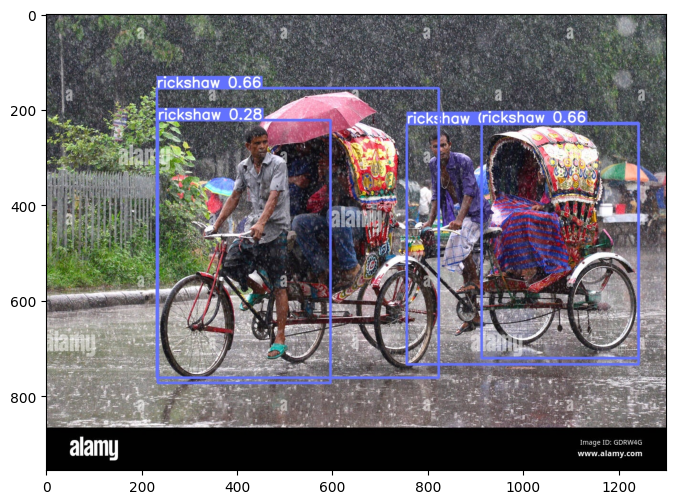

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
img = plt.imread("/kaggle/working/runs/detect/predict/test_img1.jpg")
plt.imshow(img)
plt.show()

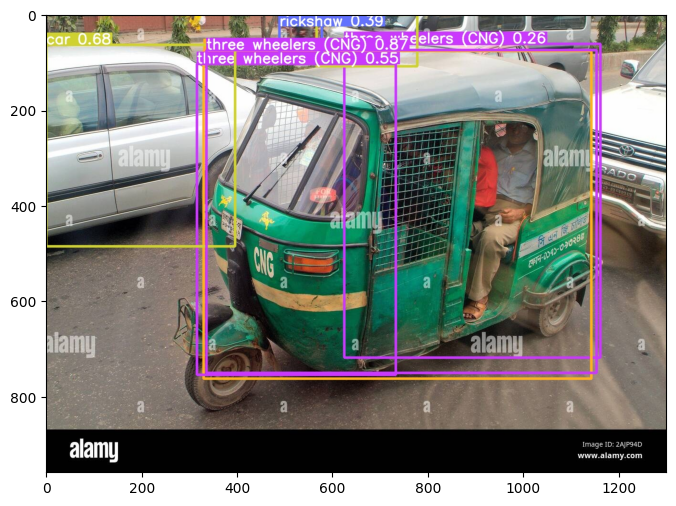

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
img = plt.imread("/kaggle/working/runs/detect/predict/test_img3.jpg")
plt.imshow(img)
plt.show()

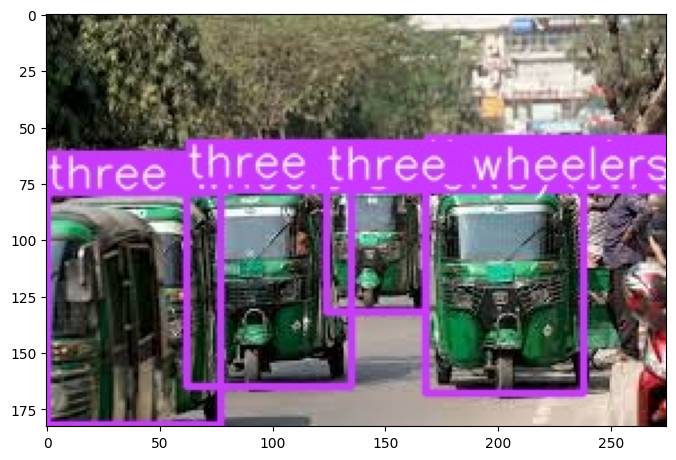

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
img = plt.imread("/kaggle/working/runs/detect/predict/test_img4.jpeg")
plt.imshow(img)
plt.show()

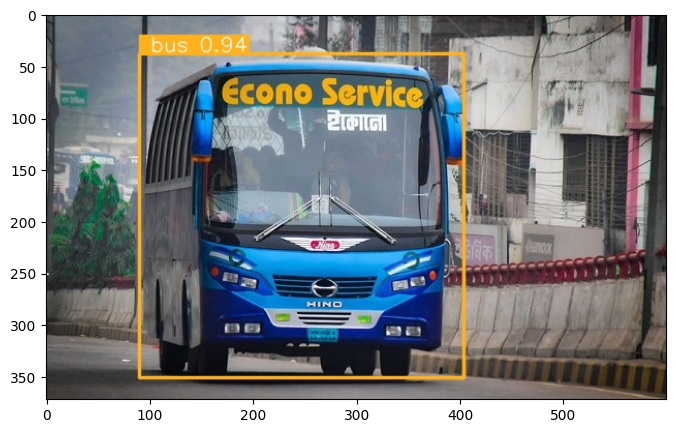

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
img = plt.imread("/kaggle/working/runs/detect/predict/test_img6.jpg")
plt.imshow(img)
plt.show()

In [43]:
!yolo 'detect' 'predict' model= "/kaggle/working/runs/detect/train/weights/best.pt" source = "/kaggle/input/test-images-for-dhaka-ai/test_img7.jpg"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.106 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients

image 1/1 /kaggle/input/test-images-for-dhaka-ai/test_img7.jpg: 640x640 2  buss, 2 cars, 1 minivan, 2 motorbikes, 3 three wheelers (CNG)s, 1 van, 9.5ms
Speed: 6.4ms preprocess, 9.5ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


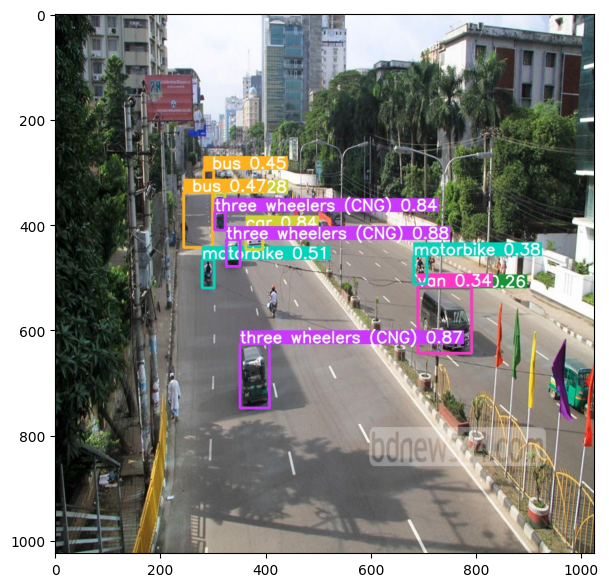

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
img = plt.imread("/kaggle/working/runs/detect/predict2/test_img7.jpg")
plt.imshow(img)
plt.show()

In [48]:
!yolo 'detect' 'predict' model= "/kaggle/working/runs/detect/train/weights/best.pt" source = "/kaggle/input/test-images-for-dhaka-ai/test_img8.jpg"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.106 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients

image 1/1 /kaggle/input/test-images-for-dhaka-ai/test_img8.jpg: 640x640 2 auto rickshaws, 1 motorbike, 1 rickshaw, 10.6ms
Speed: 6.1ms preprocess, 10.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


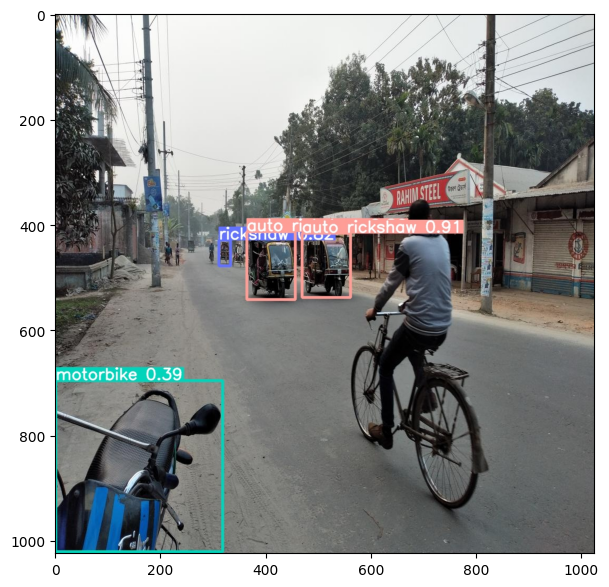

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
img = plt.imread("/kaggle/working/runs/detect/predict3/test_img8.jpg")
plt.imshow(img)
plt.show()

In [ ]:
e